In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
np.random.seed(1)

## Import dataset Iris

In [4]:
# import dataset
iris = pd.read_csv("C:/Users/salis/Desktop/iris.csv",sep=",")


In [5]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [6]:
# mix the rows

shuffled_rows = np.random.permutation(iris.index)
iris = iris.loc[shuffled_rows, :]

iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
98,5.1,2.5,3.0,1.1,versicolor
75,6.6,3.0,4.4,1.4,versicolor
16,5.4,3.9,1.3,0.4,setosa
131,7.9,3.8,6.4,2.0,virginica
56,6.3,3.3,4.7,1.6,versicolor
141,6.9,3.1,5.1,2.3,virginica
44,5.1,3.8,1.9,0.4,setosa
29,4.7,3.2,1.6,0.2,setosa
120,6.9,3.2,5.7,2.3,virginica


## Description and cleaning of the dataset

In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 1) Look at NaN values

In [8]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

There is no NaN value! 

### 2) Visualization of each variable grouped by "species"

#### sepal_length

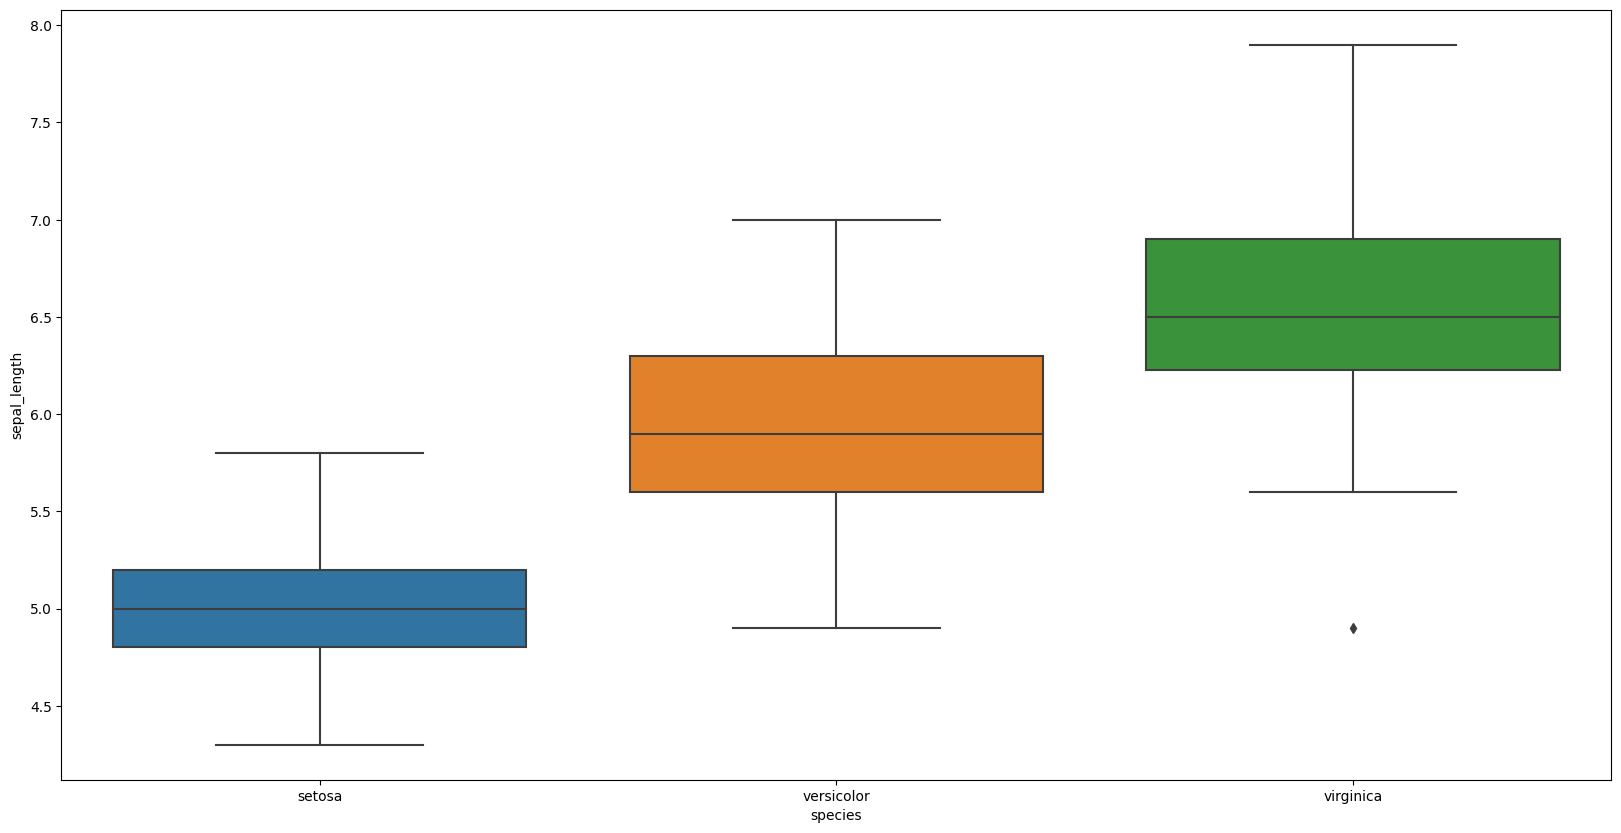

In [12]:
plt.figure(figsize=(20,10))
sns.boxplot(x=iris.species,y=iris.sepal_length)
plt.show()

#### sepal_width

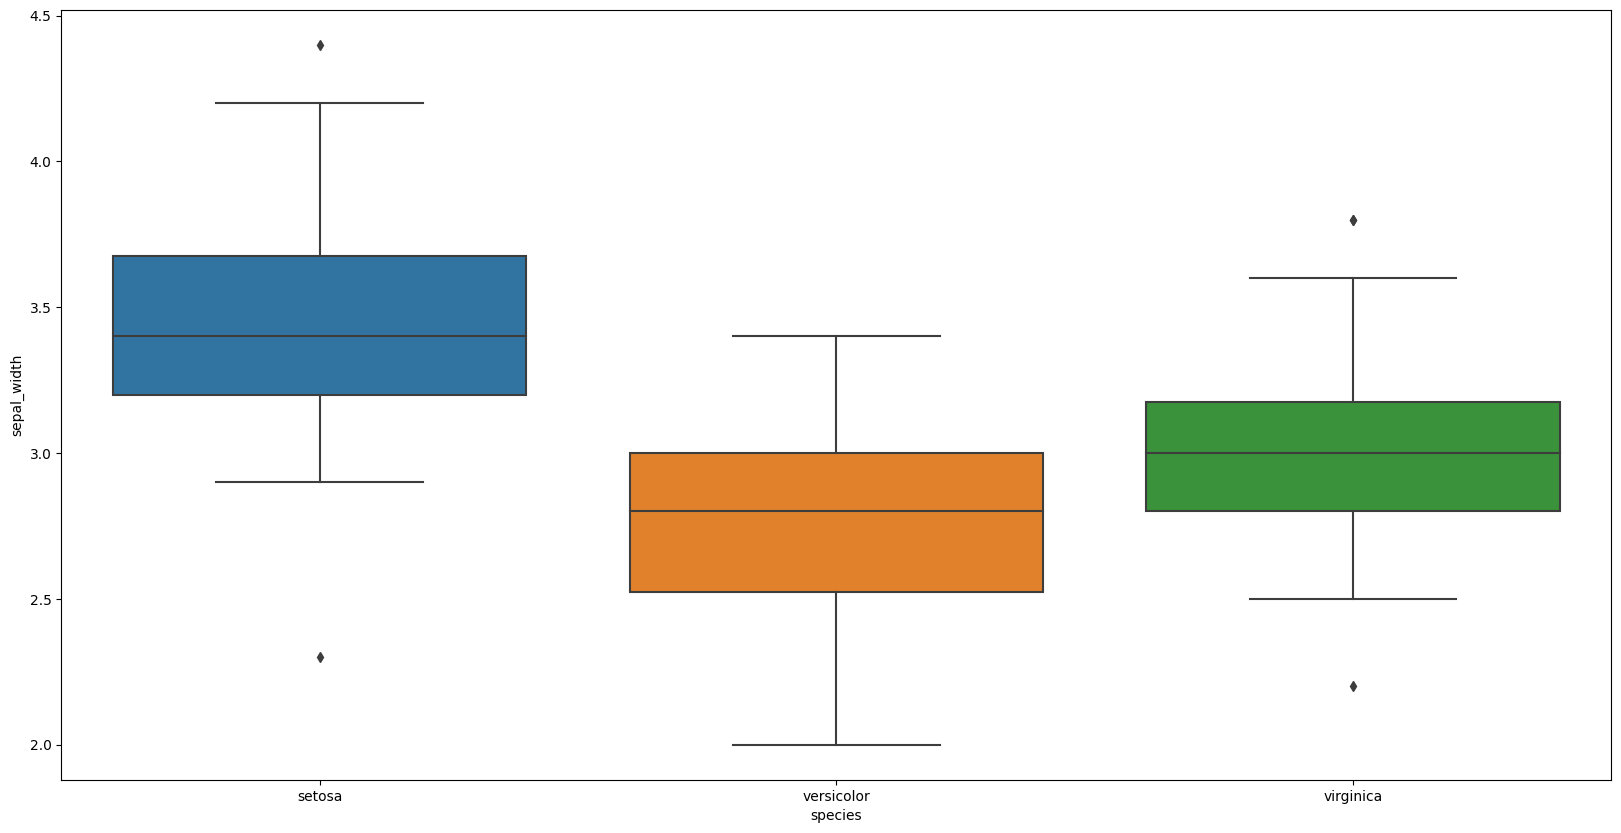

In [13]:
plt.figure(figsize=(20,10))
sns.boxplot(x=iris.species,y=iris.sepal_width)
plt.show()

#### petal_length

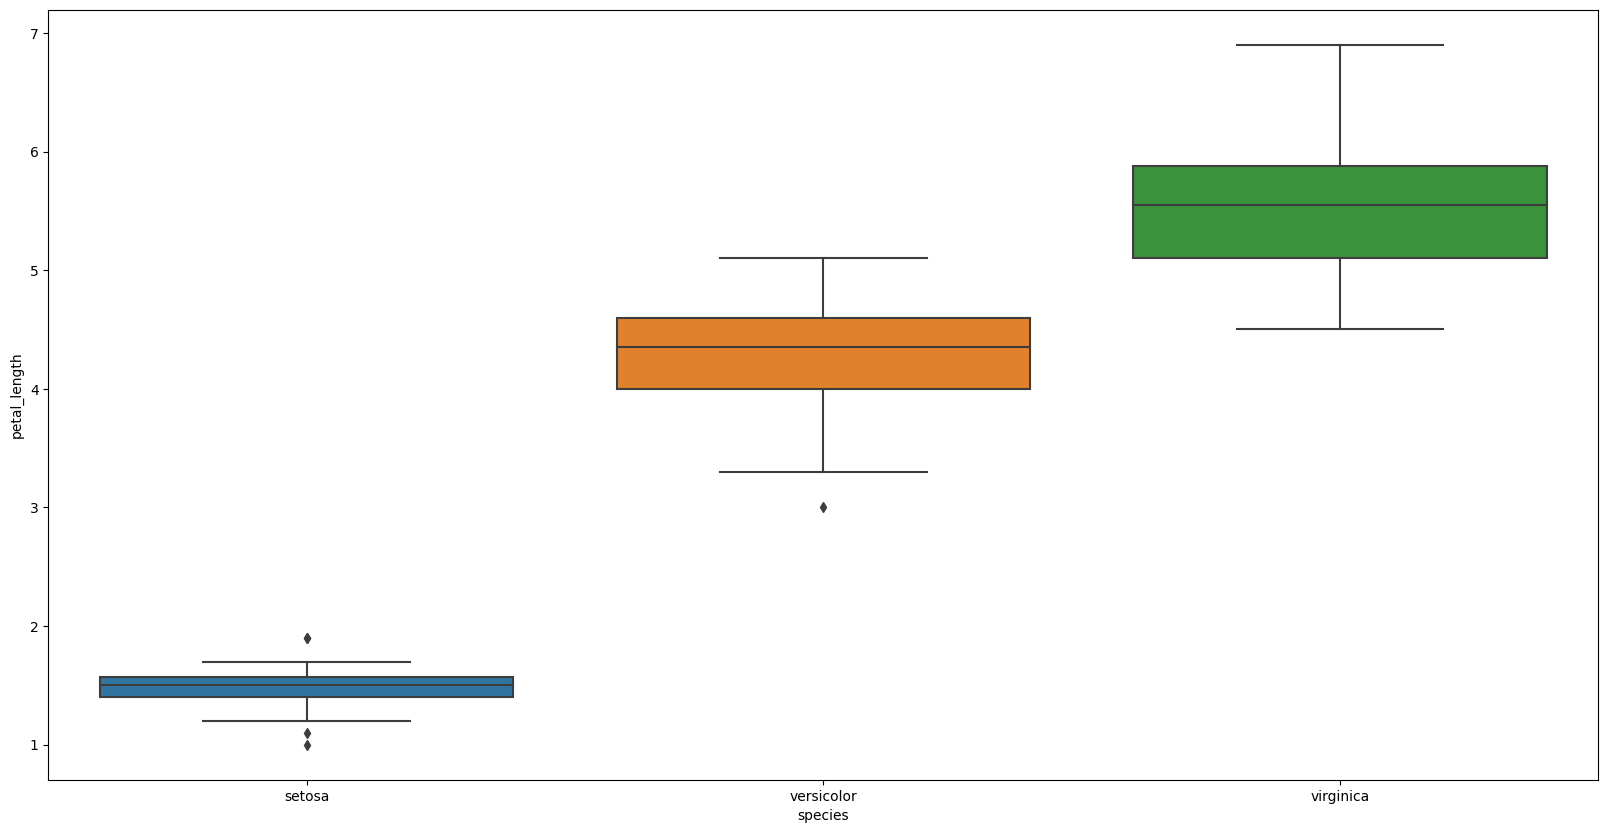

In [14]:
plt.figure(figsize=(20,10))
sns.boxplot(x=iris.species,y=iris.petal_length)
plt.show()

#### petal_width

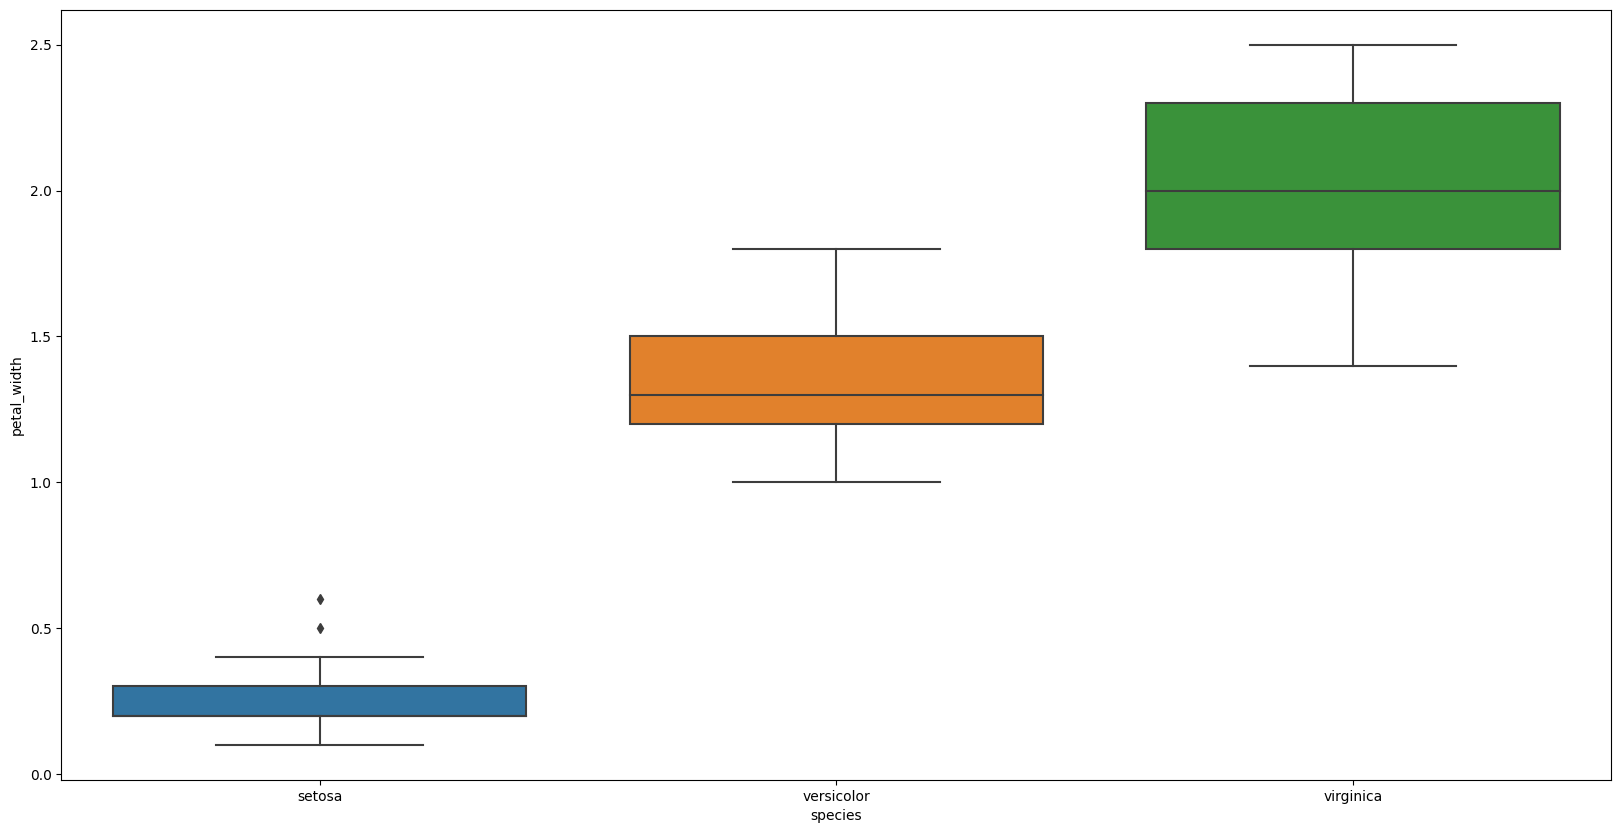

In [15]:
plt.figure(figsize=(20,10))
sns.boxplot(x=iris.species,y=iris.petal_width)
plt.show()

## Split the dataset into train and test dataset

In [18]:
from sklearn.model_selection import train_test_split

In [271]:
### this cell is not usefull here. However, this is an example of how transform a variable with string classes into int. 
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
iris['species_labelled']= label_encoder.fit_transform(iris['species'])
  
iris['species_labelled'].unique()

array([0, 1, 2])

In [227]:
X = iris.iloc[:,0:4]
#Y = iris.iloc[:,5]
Y = iris.iloc[:,4]

In [228]:
X.head(10)

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0
56,6.3,3.3,4.7,1.6
141,6.9,3.1,5.1,2.3
44,5.1,3.8,1.9,0.4
29,4.7,3.2,1.6,0.2
120,6.9,3.2,5.7,2.3


In [229]:
Y

14         setosa
98     versicolor
75     versicolor
16         setosa
131     virginica
          ...    
133     virginica
137     virginica
72     versicolor
140     virginica
37         setosa
Name: species, Length: 150, dtype: object

In [230]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify= Y, test_size = 0.2)

In [231]:
len(X_train)

120

In [232]:
len(Y_train)

120

In [233]:
len(X_test)

30

In [234]:
len(Y_test)

30

In [235]:
Y_train.value_counts()

versicolor    40
virginica     40
setosa        40
Name: species, dtype: int64

In [236]:
Y_test.value_counts()

versicolor    10
virginica     10
setosa        10
Name: species, dtype: int64

## Prediction (machine learning)

Here we are in the case of supervised classification (as the out to predict is a categorical variable).
Let's try first a __generative__ and then a __discriminative__ method.

### 1) Generative methods

#### a. Linear discriminant analysis (LDA or FDA)

In [237]:
from sklearn.preprocessing import StandardScaler

In [238]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [239]:
X_train

array([[-0.3970566 , -1.53127876, -0.0138359 , -0.25320711],
       [ 0.57285266, -1.28885996,  0.73044034,  0.95147871],
       [-0.3970566 ,  2.83225966, -1.33063235, -1.32403895],
       [ 0.81532997, -0.56160356,  0.50143227,  0.41606279],
       [ 1.05780729, -1.28885996,  1.1884565 ,  0.81762473],
       [-0.88201124, -1.28885996, -0.41460004, -0.11935313],
       [-1.73068184, -0.31918475, -1.33063235, -1.32403895],
       [ 1.05780729,  0.16565285,  0.38692823,  0.28220881],
       [ 0.69409132, -0.80402236,  0.9021964 ,  0.95147871],
       [-1.00324989,  0.65049045, -1.33063235, -1.32403895],
       [-0.88201124,  0.65049045, -1.15887629, -0.92247701],
       [-0.88201124,  1.62016565, -1.27338033, -1.05633099],
       [-1.00324989, -2.50095396, -0.12833994, -0.25320711],
       [-0.27581795, -0.07676595,  0.21517217,  0.14835483],
       [ 0.69409132,  0.16565285,  1.01670044,  0.81762473],
       [ 1.30028461,  0.16565285,  0.95944842,  1.21918667],
       [-1.00324989,  1.

In [240]:
X_test

array([[ 0.93656863, -0.31918475,  0.50143227,  0.14835483],
       [-0.3970566 , -1.04644116,  0.38692823,  0.01450085],
       [-0.15457929, -0.31918475,  0.27242419,  0.14835483],
       [ 0.33037534, -0.07676595,  0.50143227,  0.28220881],
       [ 2.27019387, -1.04644116,  1.81822871,  1.48689463],
       [-0.3970566 , -1.77369756,  0.15792015,  0.14835483],
       [-0.51829526,  0.89290925, -1.15887629, -1.32403895],
       [-0.27581795, -0.80402236,  0.27242419,  0.14835483],
       [-0.3970566 , -1.53127876,  0.04341611, -0.11935313],
       [ 0.57285266,  0.65049045,  1.30296054,  1.75460259],
       [-0.27581795, -1.28885996,  0.10066813, -0.11935313],
       [-0.88201124,  0.89290925, -1.27338033, -1.32403895],
       [ 1.30028461,  0.40807165,  1.13120448,  1.48689463],
       [-0.88201124,  1.86258445, -1.27338033, -1.19018497],
       [ 2.27019387,  1.86258445,  1.70372467,  1.35304065],
       [ 0.69409132, -0.56160356,  1.07395246,  1.35304065],
       [-0.76077258,  2.

In [241]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import classification_report

In [242]:
lda_model = LDA(n_components=1)
lda_model.fit(X=X_train, y=Y_train)

LinearDiscriminantAnalysis(n_components=1)

In [243]:
Y_test_predicted_LDA = lda_model.predict(X_test)

In [244]:
report_LDA = classification_report(y_pred=Y_test_predicted_LDA, y_true=Y_test)

In [245]:
print(report_LDA)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### b. Logistic regression

In [246]:
from sklearn.linear_model import LogisticRegression

In [247]:
lr_model = LogisticRegression(random_state=0,max_iter=1000)

In [248]:
lr_model.fit(X=X_train, y=Y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [249]:
Y_test_predicted_LR = lr_model.predict(X_test)

In [250]:
report_LR = classification_report(y_pred=Y_test_predicted_LR, y_true=Y_test)

In [251]:
print(report_LR)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 2) Discriminative methods

Discriminative methods contain SVM, k-nn and CNN

#### a. Support Vector Machine for Classification

In [252]:
from sklearn.svm import SVC

In [253]:
svc_model = SVC(random_state=0,max_iter=100)

In [254]:
svc_model.fit(X=X_train, y=Y_train)

SVC(max_iter=100, random_state=0)

In [255]:
Y_test_predicted_svc = svc_model.predict(X_test)

In [256]:
report_svc = classification_report(y_pred=Y_test_predicted_svc, y_true=Y_test)

In [257]:
print(report_svc)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### b. K-nn

In [258]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [259]:
knn_model = KNN(n_neighbors=8)

In [260]:
knn_model.fit(X=X_train, y=Y_train)

KNeighborsClassifier(n_neighbors=8)

In [261]:
Y_test_predicted_knn = knn_model.predict(X_test)

In [262]:
Y_test_predicted_knn

array(['versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'setosa', 'setosa', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'setosa', 'virginica',
       'versicolor', 'virginica', 'virginica', 'setosa', 'virginica'],
      dtype=object)

In [263]:
report_knn = classification_report(y_pred=Y_test_predicted_knn, y_true=Y_test)

In [264]:
print(report_knn)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### c. ANN

In [265]:
from sklearn.neural_network import MLPClassifier

In [266]:
nn_model = MLPClassifier(hidden_layer_sizes=(40,10),max_iter=500)

In [267]:
nn_model.fit(X=X_train,y=Y_train)

MLPClassifier(hidden_layer_sizes=(40, 10), max_iter=500)

In [268]:
y_test_predicted_nn = nn_model.predict(X_test)

In [269]:
report_nn = classification_report(y_pred=y_test_predicted_nn,y_true=Y_test)

In [270]:
print(report_nn)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 3) Conclusions
Here is an example of how to predict a class variable. As the dataset is perfect, all the prediction models give us an F1 score between 97 and 100. 